In [1]:
from tensorflow import keras
keras.layers.Conv2D(10, kernel_size=(3, 3), activation='relu')

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28, 28, 1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

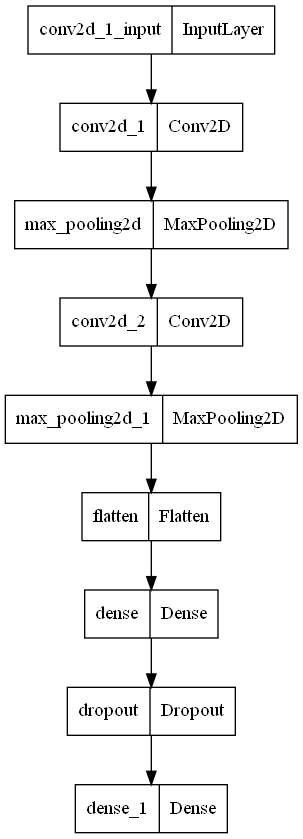

In [8]:
keras.utils.plot_model(model)

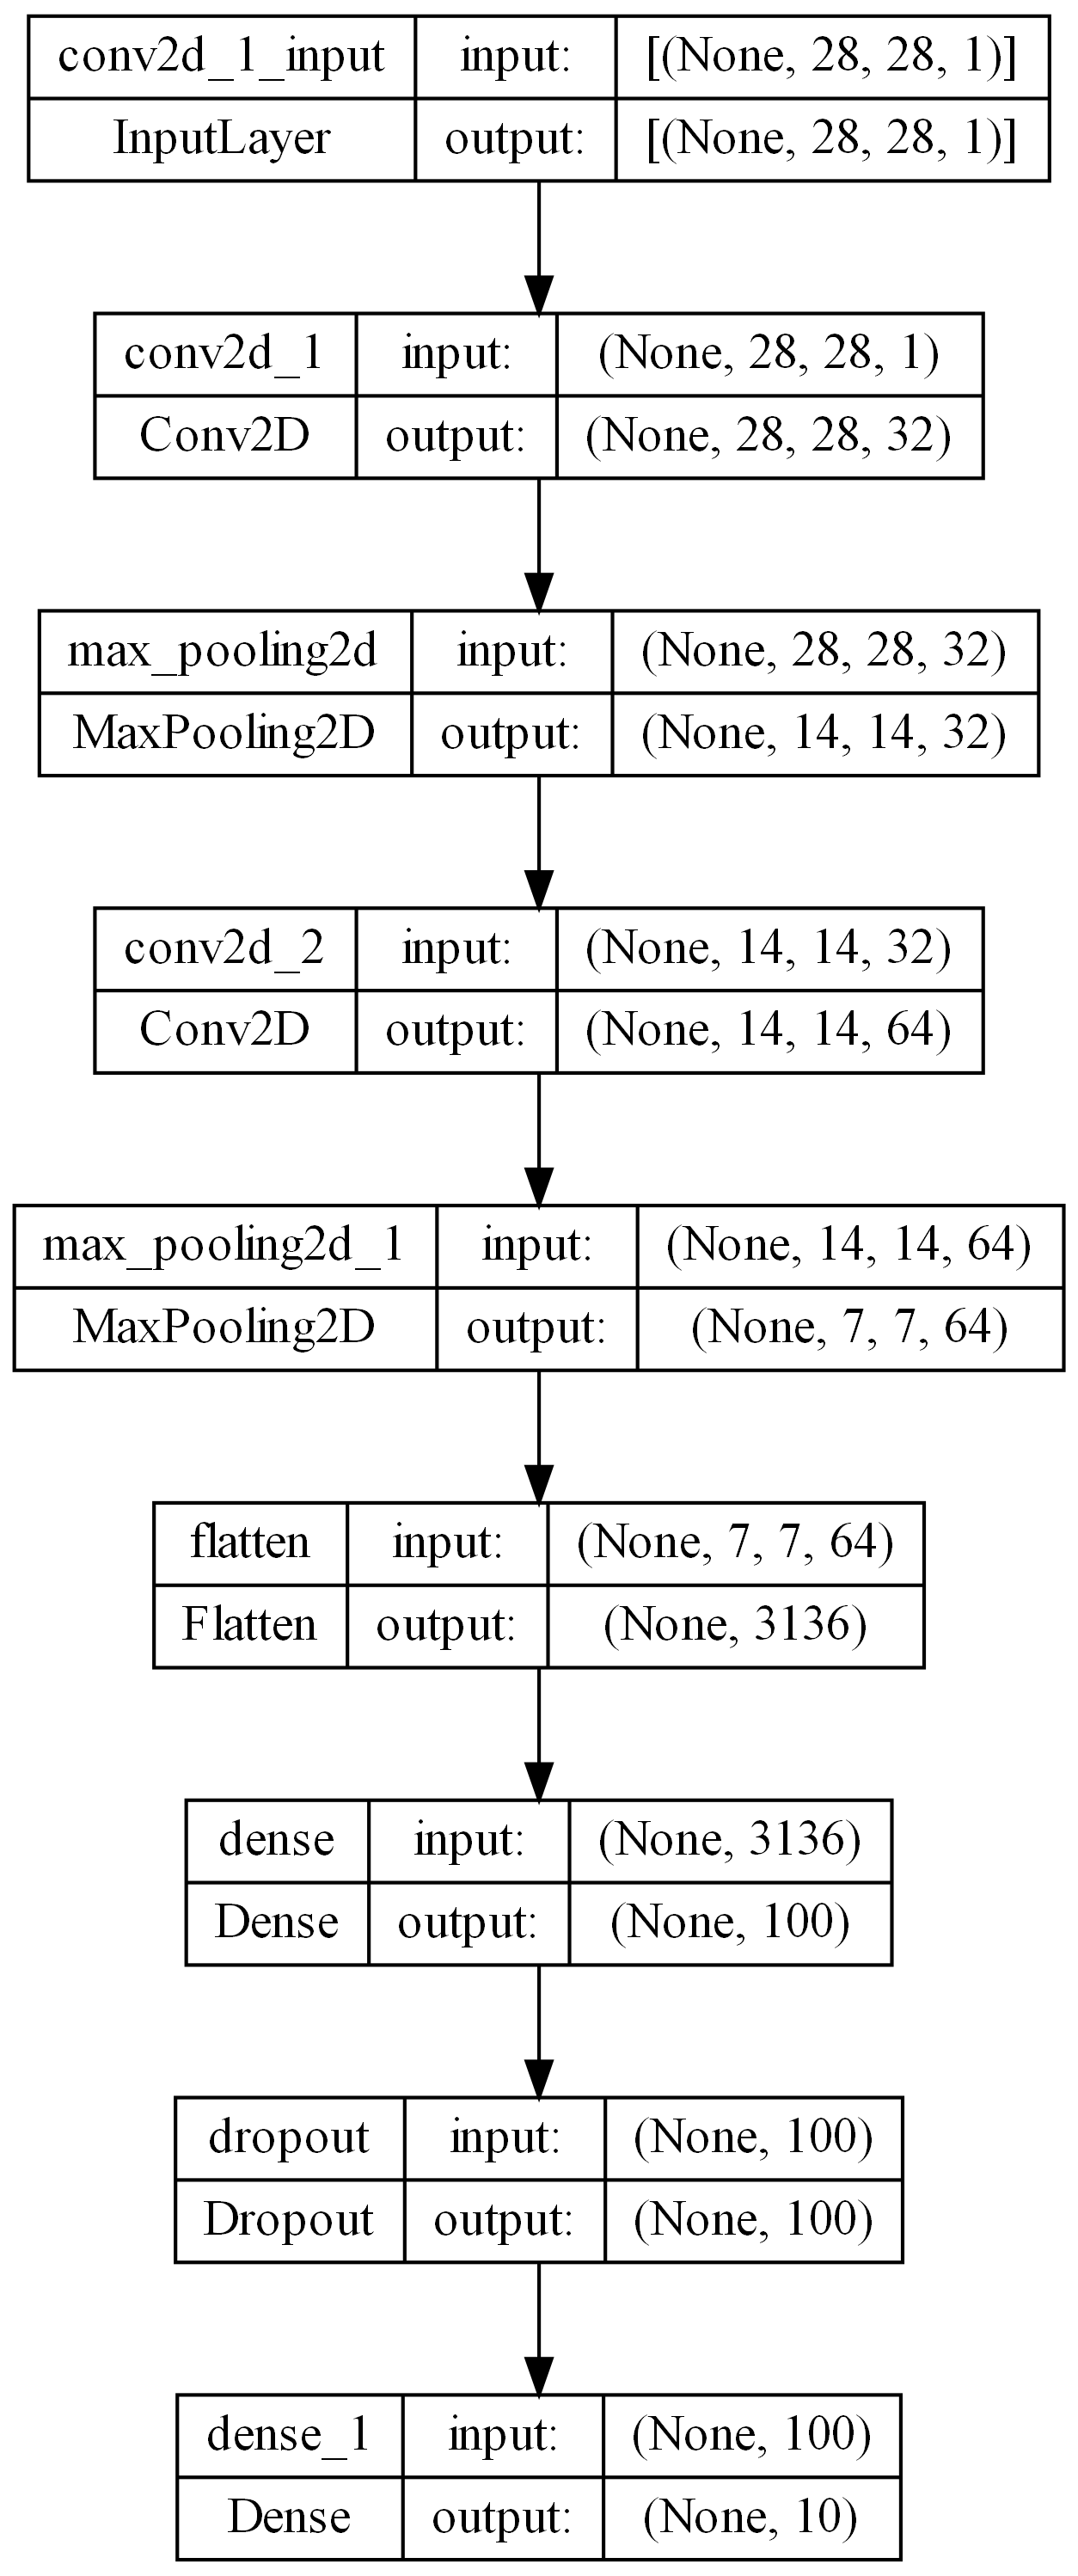

In [9]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn_architecture.png', dpi=300)

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5382 - accuracy: 0.8071 - val_loss: 0.3338 - val_accuracy: 0.8771
Epoch 2/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3570 - accuracy: 0.8724 - val_loss: 0.2795 - val_accuracy: 0.8965
Epoch 3/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3034 - accuracy: 0.8900 - val_loss: 0.2603 - val_accuracy: 0.9015
Epoch 4/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2736 - accuracy: 0.9014 - val_loss: 0.2373 - val_accuracy: 0.9128
Epoch 5/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2489 - accuracy: 0.9088 - val_loss: 0.2349 - val_accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2268 - accuracy: 0.9157 - val_loss: 0.2432 - val_accuracy: 0.9097
Epoch 7/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.2077 - accuracy: 0.9235 - val_loss: 0.2242 -

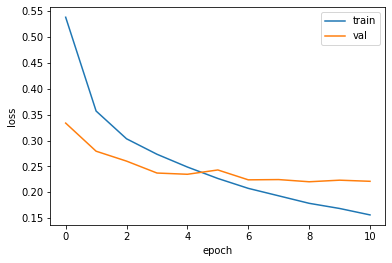

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [14]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2204 - accuracy: 0.9176


[0.2204437106847763, 0.9175833463668823]

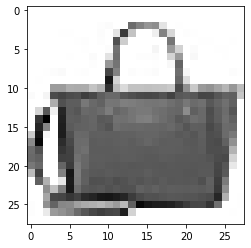

In [15]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [16]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 75ms/step
[[9.1975595e-20 3.0990981e-30 5.9765552e-25 1.5327387e-21 2.2434251e-20
  4.5669190e-19 1.5270260e-20 2.9418270e-19 1.0000000e+00 2.4240848e-19]]


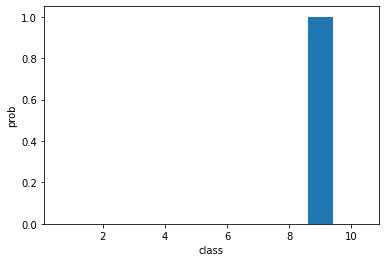

In [25]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

In [26]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [27]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [29]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [30]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2463 - accuracy: 0.9148


[0.24632076919078827, 0.9147999882698059]

In [31]:
from tensorflow import keras
model = keras.models.load_model('best_cnn_model.h5')

In [32]:
model.layers

In [33]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [34]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.048668027 0.3101955


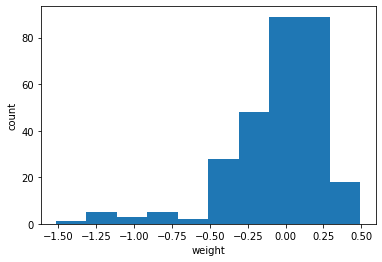

In [35]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

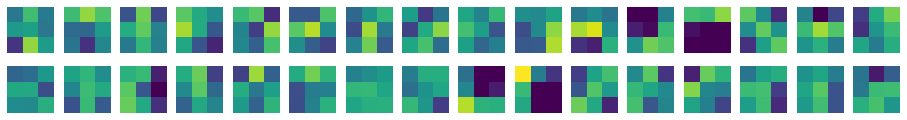

In [38]:
fig, axs = plt.subplots(2, 16, figsize=(16, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [40]:
conv_weights.shape

(3, 3, 1, 32)

In [42]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                      'relu', padding='same', input_shape=(28, 28, 1)))

In [56]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [57]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0110380445 0.08168166


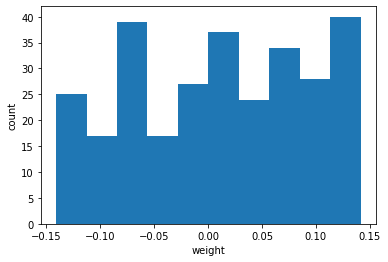

In [58]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

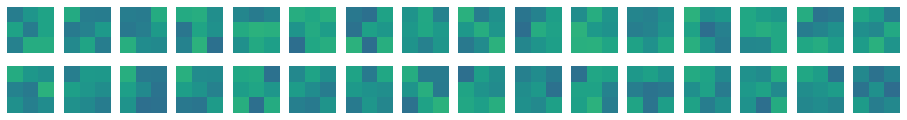

In [59]:
fig, axs = plt.subplots(2, 16, figsize=(16, 2))
for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')
plt.show()

In [61]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_1_input'), name='conv2d_1_input', description="created by layer 'conv2d_1_input'")


In [62]:
conv_acti = keras.Model(model.input, model.layers[0].output)

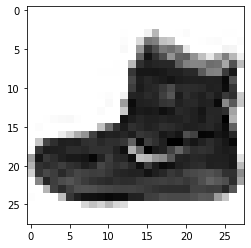

In [63]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [64]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 33ms/step


In [65]:
print(feature_maps.shape)

(1, 28, 28, 32)


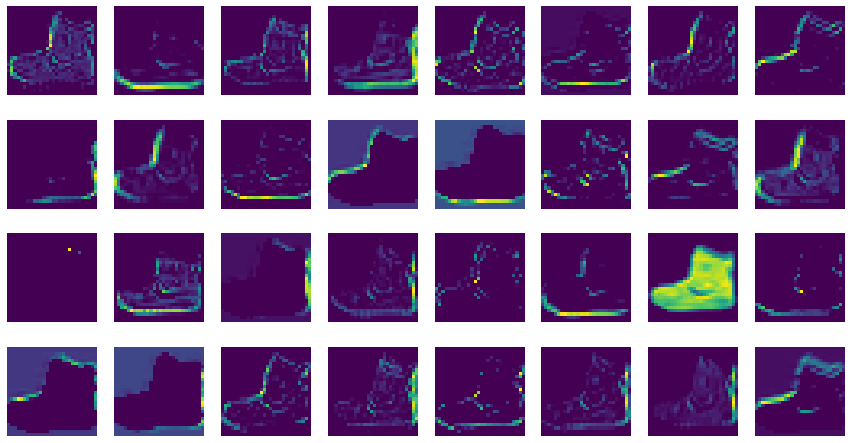

In [66]:
fix, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()

In [67]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [68]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 35ms/step


In [69]:
print(feature_maps.shape)

(1, 14, 14, 64)


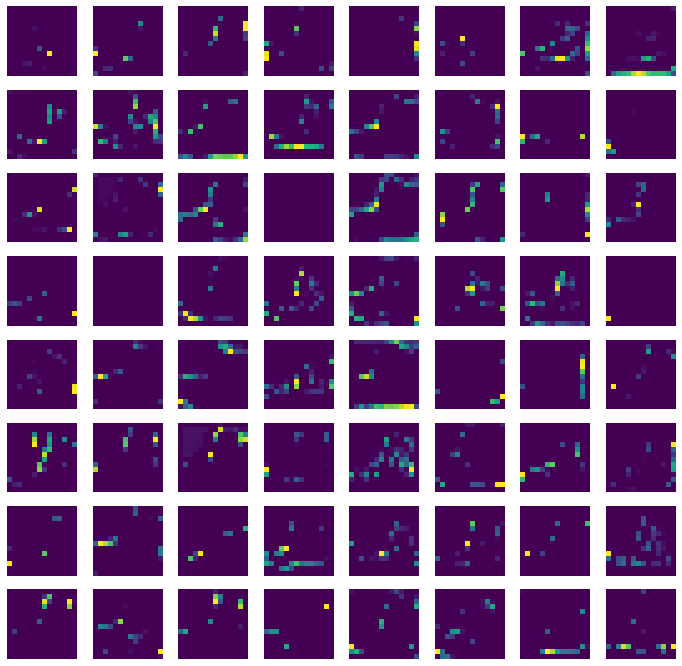

In [70]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')
plt.show()